# Multi-agents cleaners simulation
### by *Sebastián Márquez Álvarez A01632483*

## About this model

This report studies the behaviour and characteristics of a multi-agent system modeling a set of autonomous cleaners
with the objective of analysing the effectiveness of it's programmed behavior and related data to the simulation.

## Imported libraries

In [17]:
# Agents library
import agentpy as ap

# Visualization

import IPython
import matplotlib.pyplot as plt
import seaborn as sns

# Other imports

from random import choice
from time import time

## Agents code

### Cleaner agent

In [18]:
class Cleaner(ap.Agent):
    cleaners_counter = 0
    allowed_moves = (
        (1, 0),  # right
        (1, 1),  # top_right
        (0, 1),  # top
        (-1, 1),  # top_left
        (-1, 0),  # left
        (-1, -1),  # bottom_left
        (0, -1),  # bottom
        (1, -1)  # bottom_right
    )

    def setup(self):
        Cleaner.cleaners_counter += 1
        self.cleaned_spaces = 0
        self.position = (0, 0)

    def get_position(self):
        self.position: tuple[int, int] = self.model.grid.positions[self]

    def move(self):
        move_direction = choice(Cleaner.allowed_moves)
        new_position = (move_direction[0] + self.position[0], move_direction[1] + self.position[1])
        if 0 <= new_position[0] < self.model.width and 0 <= new_position[1] < self.model.height:
            self.model.grid.move_by(self, choice(Cleaner.allowed_moves))

    def move_or_clean(self):
        cleaning_done = False
        agents_in_current_pos = self.model.grid.neighbors(self, 0)  # Get all other agents in the same square
        dirt = None
        for agent in agents_in_current_pos:
            if agent.type == "Dirt":
                dirt = agent
                self.model.dirty_squares_num -= 1
                self.cleaned_spaces += 1
        if dirt:
            self.model.grid.remove_agents(dirt)

        if not cleaning_done:
            self.move()


### Dirt agent

In [19]:
class Dirt(ap.Agent):
    dirt_counter = 0

    def setup(self):
        Dirt.dirt_counter += 1

### Model using a grid (discrete)

In [20]:
class CleanersModel(ap.Model):

    def setup(self):
        self.width: int = self.p.width
        self.height: int = self.p.height
        self.num_cleaners: int = self.p.num_cleaners
        self.dirt_per: float = self.p.dirt_per

        self.dirty_squares_num = int(self.width * self.height * self.dirt_per)

        self.cleaners = ap.AgentDList(self, self.num_cleaners, Cleaner)
        self.dirt = ap.AgentDList(self, self.dirty_squares_num, Dirt)

        self.grid = ap.Grid(self, (self.width, self.height), track_empty=True)
        self.grid.add_agents(self.cleaners, [(0, 0) for _ in range(self.num_cleaners)])
        self.grid.add_agents(self.dirt, random=True, empty=True)
        self.start_time = time()

    def step(self):
        self.cleaners.get_position()
        self.cleaners.move_or_clean()
        if self.dirty_squares_num == 0:
            self.stop()

    def update(self):
        self.cleaners.record('cleaned_spaces')

    def end(self):
        self.report('Time elapsed', time() - self.start_time)
        self.report('Percentage of clean squares', self.width * self.height - self.dirty_squares_num)
        self.report('Time steps done', self.t)

## Tests and graphs with different parameters as input

### Different ***dirt percentages***

In [21]:
parameters = {
    'width': 30,
    'height': 30,
    'num_cleaners': 10,
    'dirt_per': ap.Range(0.2, 0.6), # Dirt ranges from 20% to 60% of all squares
    'steps': 10000
}

In [22]:
# Prepare parameter sample
sample = ap.Sample(parameters, n=13)

In [23]:
# Perform experiment
num_experiments = 20
exp = ap.Experiment(CleanersModel, sample, num_experiments)
results = exp.run()

Scheduled runs: 260
Completed: 260, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:03:16.695978


In [24]:
# Save and load data
results.save()
results = ap.DataDict.load('CleanersModel')

Data saved to ap_output/CleanersModel_2
Loading from directory ap_output/CleanersModel_2/
Loading info.json - Successful
Loading parameters_constants.json - Successful
Loading parameters_log.json - Successful
Loading parameters_sample.csv - Successful
Loading reporters.csv - Successful


<AxesSubplot:xlabel='dirt_per', ylabel='Time elapsed'>

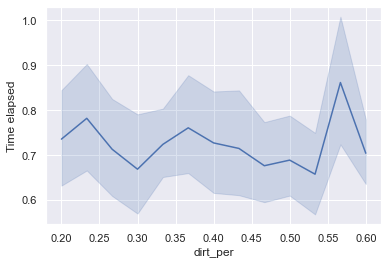

In [25]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='dirt_per',
    y='Time elapsed'
)

<AxesSubplot:xlabel='dirt_per', ylabel='Percentage of clean squares'>

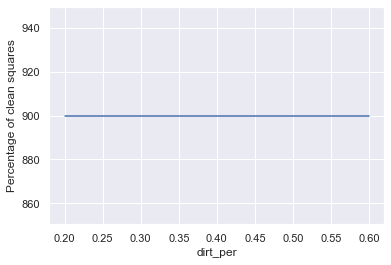

In [26]:
sns.lineplot(
    data=results.arrange_reporters(),
    x='dirt_per',
    y='Percentage of clean squares'
)

<AxesSubplot:xlabel='dirt_per', ylabel='Time steps done'>

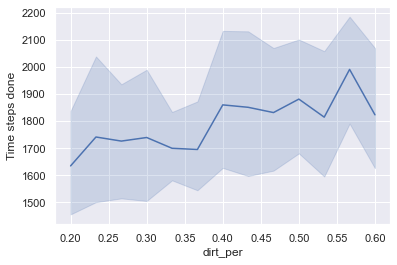

In [27]:
sns.lineplot(
    data=results.arrange_reporters(),
    x='dirt_per',
    y='Time steps done'
)

## Tests and graphs with different parameters as input

### Different ***dirt percentages***

In [28]:
parameters = {
    'width': 30,
    'height': 30,
    'num_cleaners': 10,
    'dirt_per': ap.Range(0.15, 0.75), # Dirt ranges from 20% to 60% of all squares
    'steps': 10000
}

In [29]:
# Prepare parameter sample
sample = ap.Sample(parameters, n=13)

In [30]:
# Perform experiment
num_experiments = 20
exp = ap.Experiment(CleanersModel, sample, num_experiments)
results = exp.run()

Scheduled runs: 260
Completed: 260, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:03:34.050710


In [31]:
# Save and load data
results.save()
results = ap.DataDict.load('CleanersModel')

Data saved to ap_output/CleanersModel_3
Loading from directory ap_output/CleanersModel_3/
Loading info.json - Successful
Loading parameters_constants.json - Successful
Loading parameters_log.json - Successful
Loading parameters_sample.csv - Successful
Loading reporters.csv - Successful


<AxesSubplot:xlabel='dirt_per', ylabel='Time elapsed'>

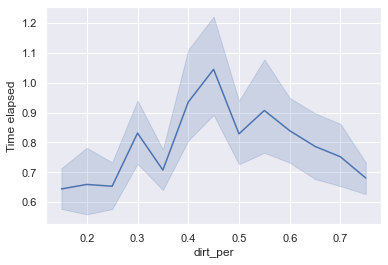

In [32]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='dirt_per',
    y='Time elapsed'
)

<AxesSubplot:xlabel='dirt_per', ylabel='Percentage of clean squares'>

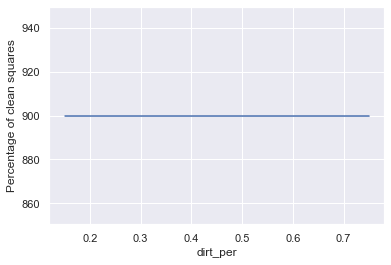

In [33]:
sns.lineplot(
    data=results.arrange_reporters(),
    x='dirt_per',
    y='Percentage of clean squares'
)

<AxesSubplot:xlabel='dirt_per', ylabel='Time steps done'>

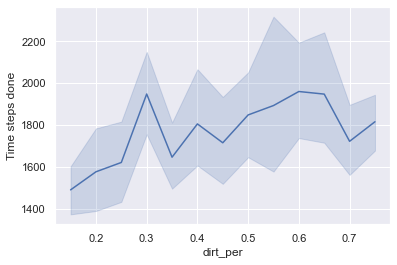

In [34]:
sns.lineplot(
    data=results.arrange_reporters(),
    x='dirt_per',
    y='Time steps done'
)

### Different ***maximum steps***

In [35]:
parameters = {
    'width': 30,
    'height': 30,
    'num_cleaners': 10,
    'dirt_per': 0.4,
    'steps': ap.Range(10, 10000) # Number of steps ranges from 10 to 10000
}

In [36]:
# Prepare parameter sample
sample = ap.Sample(parameters, n=13)

In [37]:
# Perform experiment
num_experiments = 20
exp = ap.Experiment(CleanersModel, sample, num_experiments)
results = exp.run()

Scheduled runs: 260
Completed: 260, estimated time remaining: 0:00:00
Experiment finished
Run time: 0:02:44.669638


In [38]:
# Save and load data
results.save()
results = ap.DataDict.load('CleanersModel')

Data saved to ap_output/CleanersModel_4
Loading from directory ap_output/CleanersModel_4/
Loading info.json - Successful
Loading parameters_constants.json - Successful
Loading parameters_log.json - Successful
Loading parameters_sample.csv - Successful
Loading reporters.csv - Successful


<AxesSubplot:xlabel='steps', ylabel='Time elapsed'>

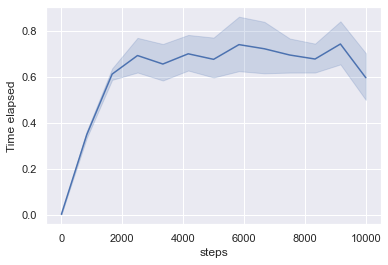

In [39]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='steps',
    y='Time elapsed'
)

<AxesSubplot:xlabel='steps', ylabel='Percentage of clean squares'>

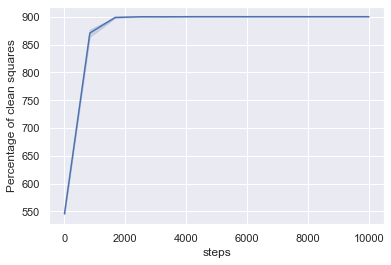

In [40]:
sns.lineplot(
    data=results.arrange_reporters(),
    x='steps',
    y='Percentage of clean squares'
)

<AxesSubplot:xlabel='steps', ylabel='Time steps done'>

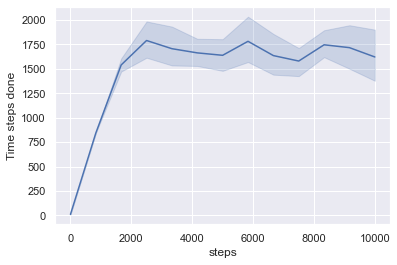

In [41]:
sns.lineplot(
    data=results.arrange_reporters(),
    x='steps',
    y='Time steps done'
)

### Different ***number of cleaners***

In [42]:
parameters = {
    'width': 30,
    'height': 30,
    'num_cleaners': ap.Range(5, 60), # Number of cleaners ranges from 5 to 60
    'dirt_per': 0.4,
    'steps': ap.Range(10, 10000)
}

In [43]:
# Prepare parameter sample
sample = ap.Sample(parameters, n=13)

In [44]:
# Perform experiment
num_experiments = 20
exp = ap.Experiment(CleanersModel, sample, num_experiments)
results = exp.run()

Scheduled runs: 3380


TypeError: 'numpy.float64' object is not iterable

In [ ]:
# Save and load data
results.save()
results = ap.DataDict.load('CleanersModel')

In [ ]:
# Plot sensitivity
sns.set_theme()
sns.lineplot(
    data=results.arrange_reporters(),
    x='num_cleaners',
    y='Time elapsed'
)

In [ ]:
sns.lineplot(
    data=results.arrange_reporters(),
    x='num_cleaners',
    y='Percentage of clean squares'
)

In [ ]:
sns.lineplot(
    data=results.arrange_reporters(),
    x='num_cleaners',
    y='Time steps done'
)